In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [ ]:
import pandas as pd

df = pd.read_csv('HistoricalData.csv')

df

,Date,Close/Last,Volume,Open,High,Low
0,11/04/2022,98.57,30706.0,94.48,98.69,98.49
1,11/03/2022,94.67,20460.0,95.66,94.55,94.38
2,11/02/2022,96.16,26700.0,94.67,96.47,93.99
3,11/01/2022,94.65,19882.0,92.80,95.55,92.36
4,10/31/2022,94.83,377.0,96.00,96.00,94.32
...,...,...,...,...,...,...
2542,11/13/2012,108.26,370.0,108.51,108.71,107.50
2543,11/12/2012,109.07,391.0,109.32,110.10,108.69
2544,11/09/2012,109.40,244.0,107.42,109.60,106.28
2545,11/08/2012,107.25,179.0,107.31,107.93,106.35


**Rearrange the order of the rows**

In [ ]:
df = df[::-1].reset_index(drop = True)

In [ ]:
df['Close'] = df['Close/Last']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2547 non-null   object 
 1   Close/Last  2547 non-null   float64
 2   Volume      2513 non-null   float64
 3   Open        2547 non-null   float64
 4   High        2547 non-null   float64
 5   Low         2547 non-null   float64
 6   Close       2547 non-null   float64
dtypes: float64(6), object(1)
memory usage: 139.4+ KB


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,11/07/2012,106.82
1,11/08/2012,107.25
2,11/09/2012,109.40
3,11/12/2012,109.07
4,11/13/2012,108.26
...,...,...
2542,10/31/2022,94.83
2543,11/01/2022,94.65
2544,11/02/2022,96.16
2545,11/03/2022,94.67


In [ ]:
df['Date']

0       11/07/2012
1       11/08/2012
2       11/09/2012
3       11/12/2012
4       11/13/2012
           ...    
2542    10/31/2022
2543    11/01/2022
2544    11/02/2022
2545    11/03/2022
2546    11/04/2022
Name: Date, Length: 2547, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

# datetime_object = str_to_datetime('11/07/2012')
# datetime_object

In [ ]:
df

,Date,Close
0,11/07/2012,106.82
1,11/08/2012,107.25
2,11/09/2012,109.40
3,11/12/2012,109.07
4,11/13/2012,108.26
...,...,...
2542,10/31/2022,94.83
2543,11/01/2022,94.65
2544,11/02/2022,96.16
2545,11/03/2022,94.67


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2012-11-07
1      2012-11-08
2      2012-11-09
3      2012-11-12
4      2012-11-13
          ...    
2542   2022-10-31
2543   2022-11-01
2544   2022-11-02
2545   2022-11-03
2546   2022-11-04
Name: Date, Length: 2547, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2012-11-07,106.82
2012-11-08,107.25
2012-11-09,109.40
2012-11-12,109.07
2012-11-13,108.26
...,...
2022-10-31,94.83
2022-11-01,94.65
2022-11-02,96.16


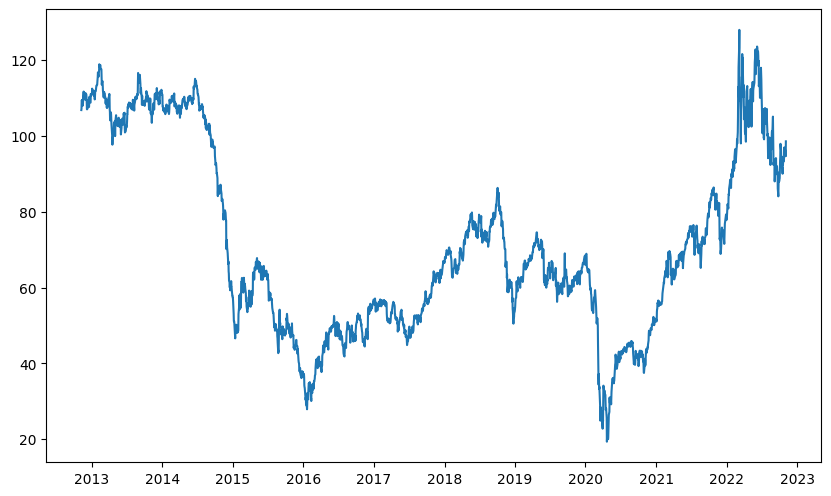

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(df.index, df['Close'])
plt.savefig('lstm_data_plot.png')

In [ ]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df




In [ ]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2012-11-12', 
                                '2022-11-04', 
                                n=3)

In [ ]:
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2012-11-12,106.82,107.25,109.40,109.07
1,2012-11-13,107.25,109.40,109.07,108.26
2,2012-11-14,109.40,109.07,108.26,109.61
3,2012-11-15,109.07,108.26,109.61,108.01
4,2012-11-16,108.26,109.61,108.01,108.95
...,...,...,...,...,...
2539,2022-10-31,95.69,96.96,95.77,94.83
2540,2022-11-01,96.96,95.77,94.83,94.65
2541,2022-11-02,95.77,94.83,94.65,96.16
2542,2022-11-03,94.83,94.65,96.16,94.67


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2544,), (2544, 3, 1), (2544,))

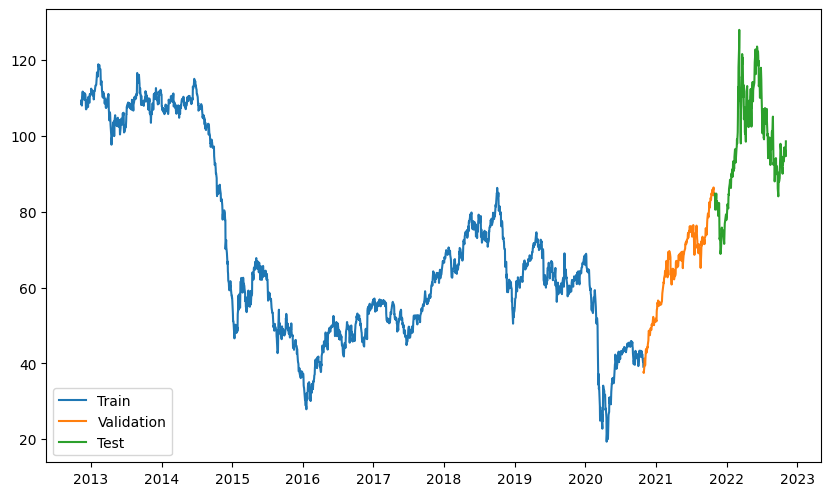

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
plt.savefig('train_val_test_split')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.003),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
64/64 [==============================] - 8s 13ms/step - loss: 2385.3562 - mean_absolute_error: 39.8837 - val_loss: 123.5596 - val_mean_absolute_error: 8.5251
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 170.3608 - mean_absolute_error: 7.6175 - val_loss: 2.2661 - val_mean_absolute_error: 1.2067
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 2.1583 - mean_absolute_error: 1.1143 - val_loss: 1.8098 - val_mean_absolute_error: 1.0031
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 2.0770 - mean_absolute_error: 1.0716 - val_loss: 1.9653 - val_mean_absolute_error: 1.1214
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 2.2512 - mean_absolute_error: 1.1349 - val_loss: 2.6849 - val_mean_absolute_error: 1.2751
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 2.3246 - mean_absolute_error: 1.1550 - val_loss: 2.8377 - val_mean_absolute_error: 1.4054
Epoch 7/100
6

KeyboardInterrupt: ignored

64/64 [==============================] - 0s 2ms/step


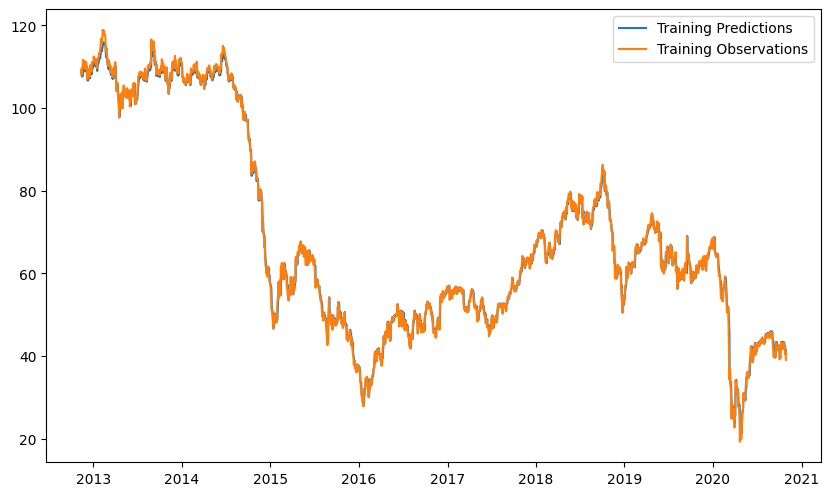

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

plt.savefig("Train_pred_observe.png")

8/8 [==============================] - 0s 2ms/step


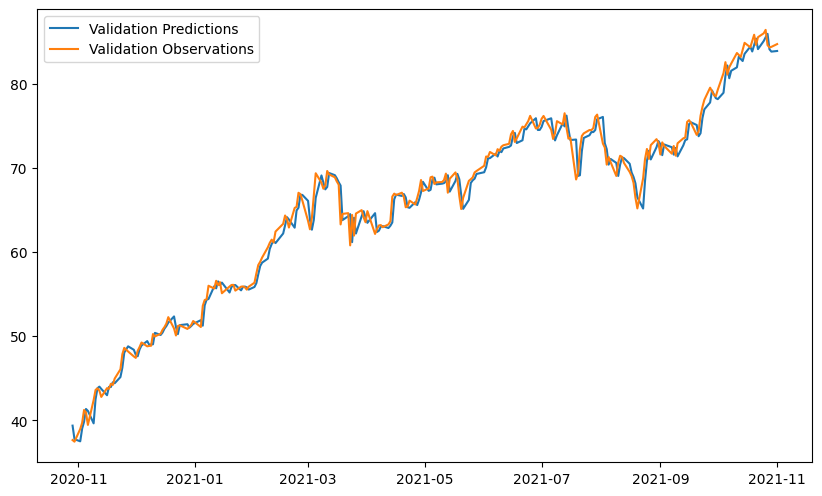

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dates_val, val_predictions)
# plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

plt.savefig("Val_pred_observe.png")

In [ ]:
print(dates_test)


[Timestamp('2021-11-02 00:00:00') Timestamp('2021-11-03 00:00:00')
 Timestamp('2021-11-04 00:00:00') Timestamp('2021-11-05 00:00:00')
 Timestamp('2021-11-08 00:00:00') Timestamp('2021-11-09 00:00:00')
 Timestamp('2021-11-10 00:00:00') Timestamp('2021-11-11 00:00:00')
 Timestamp('2021-11-12 00:00:00') Timestamp('2021-11-15 00:00:00')
 Timestamp('2021-11-16 00:00:00') Timestamp('2021-11-17 00:00:00')
 Timestamp('2021-11-18 00:00:00') Timestamp('2021-11-19 00:00:00')
 Timestamp('2021-11-22 00:00:00') Timestamp('2021-11-23 00:00:00')
 Timestamp('2021-11-24 00:00:00') Timestamp('2021-11-26 00:00:00')
 Timestamp('2021-11-29 00:00:00') Timestamp('2021-11-30 00:00:00')
 Timestamp('2021-12-01 00:00:00') Timestamp('2021-12-02 00:00:00')
 Timestamp('2021-12-03 00:00:00') Timestamp('2021-12-06 00:00:00')
 Timestamp('2021-12-07 00:00:00') Timestamp('2021-12-08 00:00:00')
 Timestamp('2021-12-09 00:00:00') Timestamp('2021-12-10 00:00:00')
 Timestamp('2021-12-13 00:00:00') Timestamp('2021-12-14 00:00:

8/8 [==============================] - 0s 4ms/step


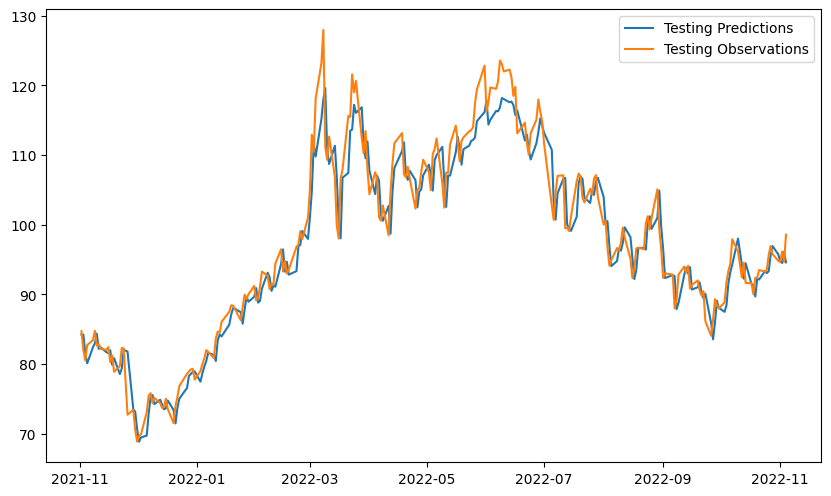

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

plt.savefig("test_pred_actual.png")

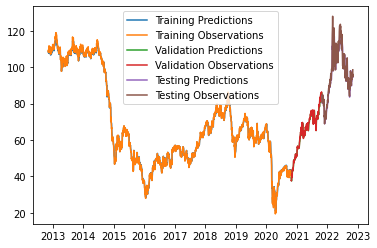

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

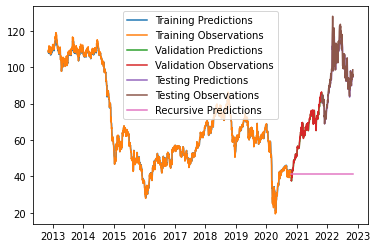

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:
test_predictions[0], y_test[0]

(84.22959, 84.72)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
train_score = r2_score(y_train, train_predictions)

val_score = r2_score(y_val,val_predictions)

test_score = r2_score(y_test,test_predictions)

In [ ]:
print(train_score, val_score, test_score)

0.9972910789411893 0.9879985733951246 0.9479118396077695
